In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split as split
import sklearn.metrics as metrics
from imblearn.under_sampling import RandomUnderSampler

In [2]:
ar=pd.read_csv("Analytics in Finance\application_record.csv")
ar.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
cr = pd.read_csv(r"C:\Users\vaish\OneDrive\Desktop\Data Science\PGA\ML Advance\Analytics in Finance\credit_record.csv")
cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
ar.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [7]:
duplicates_bool = ar.duplicated(subset="ID", keep=False)
print("The are",sum(duplicates_bool),"duplicates in ID column")

The are 94 duplicates in ID column


In [8]:
duplicates = ar[duplicates_bool].sort_values("ID")
duplicates.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
426488,7023108,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-17590,-1273,1,0,0,0,Cleaning staff,2.0
425306,7023651,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229,-1209,1,0,0,0,Accountants,1.0
421907,7023651,M,Y,N,1,157500.0,Commercial associate,Incomplete higher,Married,House / apartment,-10521,-1457,1,0,0,0,Drivers,3.0
427778,7024111,M,N,N,2,157500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-15270,-117,1,1,0,0,Drivers,4.0
432643,7024111,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-22041,-1524,1,1,1,0,Accountants,2.0


In [9]:
duplicates["ID"].value_counts().max()

2

In [10]:
ar_unique=ar.drop_duplicates(subset="ID",keep=False,inplace=False)
ar_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438463 non-null  int64  
 1   CODE_GENDER          438463 non-null  object 
 2   FLAG_OWN_CAR         438463 non-null  object 
 3   FLAG_OWN_REALTY      438463 non-null  object 
 4   CNT_CHILDREN         438463 non-null  int64  
 5   AMT_INCOME_TOTAL     438463 non-null  float64
 6   NAME_INCOME_TYPE     438463 non-null  object 
 7   NAME_EDUCATION_TYPE  438463 non-null  object 
 8   NAME_FAMILY_STATUS   438463 non-null  object 
 9   NAME_HOUSING_TYPE    438463 non-null  object 
 10  DAYS_BIRTH           438463 non-null  int64  
 11  DAYS_EMPLOYED        438463 non-null  int64  
 12  FLAG_MOBIL           438463 non-null  int64  
 13  FLAG_WORK_PHONE      438463 non-null  int64  
 14  FLAG_PHONE           438463 non-null  int64  
 15  FLAG_EMAIL           4

In [11]:
cr.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [12]:
credit_decision = pd.DataFrame()
credit_decision["ID"] = cr["ID"].unique()

In [13]:
def get_credit_decision(id):
    GOOD_STATUS =["0"]
    BAD_STATUS =["1","2","3","4","5"]
    UNUSED_STATUS =["X"]
    
    client_status = cr[cr["ID"] == id]["STATUS"].tolist()
    
    if any(status in BAD_STATUS for status in client_status):
        return 1
    
    elif all(status in UNUSED_STATUS for status in client_status):
        return -1
    else:
        return 0

In [14]:
credit_decision["Decision"]=credit_decision["ID"].map(get_credit_decision)
credit_decision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        45985 non-null  int64
 1   Decision  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


In [15]:
credit_decision["Decision"].value_counts()

Decision
 0    36099
 1     5350
-1     4536
Name: count, dtype: int64

In [16]:
credit_decision = credit_decision[credit_decision["Decision"]!=-1]

In [17]:
credit_decision["Decision"].value_counts()

Decision
0    36099
1     5350
Name: count, dtype: int64

In [18]:
join_data = pd.merge(credit_decision,ar_unique)
join_data.head()

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008810,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [19]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33110 entries, 0 to 33109
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   33110 non-null  int64  
 1   Decision             33110 non-null  int64  
 2   CODE_GENDER          33110 non-null  object 
 3   FLAG_OWN_CAR         33110 non-null  object 
 4   FLAG_OWN_REALTY      33110 non-null  object 
 5   CNT_CHILDREN         33110 non-null  int64  
 6   AMT_INCOME_TOTAL     33110 non-null  float64
 7   NAME_INCOME_TYPE     33110 non-null  object 
 8   NAME_EDUCATION_TYPE  33110 non-null  object 
 9   NAME_FAMILY_STATUS   33110 non-null  object 
 10  NAME_HOUSING_TYPE    33110 non-null  object 
 11  DAYS_BIRTH           33110 non-null  int64  
 12  DAYS_EMPLOYED        33110 non-null  int64  
 13  FLAG_MOBIL           33110 non-null  int64  
 14  FLAG_WORK_PHONE      33110 non-null  int64  
 15  FLAG_PHONE           33110 non-null 

In [20]:
columns = join_data.columns.difference(["ID"])
join_data["INFO"] = join_data[columns].apply(lambda x:"_".join(x.map(str)),axis=1)
join_data["INFO"].nunique()

10927

In [21]:
join_data["INFO"].value_counts().sort_values(ascending=False).head(1)

INFO
297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Secondary / secondary special_Single / not married_Rented apartment_Commercial associate_Laborers    38
Name: count, dtype: int64

In [22]:
join_data[join_data["INFO"]=="297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Secondary / secondary special_Single / not married_Rented apartment_Commercial associate_Laborers"]

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,INFO
69,5008891,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
70,5008892,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
71,5008893,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
72,5008894,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
73,5008895,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
74,5008896,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
75,5008897,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
76,5008898,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
77,5008899,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...
78,5008900,0,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,297000.0_0_1.0_F_-15519_-3234_0_0_1_N_Y_0_0_Se...


In [23]:
unique_join_data = join_data.drop_duplicates(subset = "INFO", keep="first")
unique_join_data.drop("INFO",axis=1,inplace=True)
unique_join_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10927 entries, 0 to 33105
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10927 non-null  int64  
 1   Decision             10927 non-null  int64  
 2   CODE_GENDER          10927 non-null  object 
 3   FLAG_OWN_CAR         10927 non-null  object 
 4   FLAG_OWN_REALTY      10927 non-null  object 
 5   CNT_CHILDREN         10927 non-null  int64  
 6   AMT_INCOME_TOTAL     10927 non-null  float64
 7   NAME_INCOME_TYPE     10927 non-null  object 
 8   NAME_EDUCATION_TYPE  10927 non-null  object 
 9   NAME_FAMILY_STATUS   10927 non-null  object 
 10  NAME_HOUSING_TYPE    10927 non-null  object 
 11  DAYS_BIRTH           10927 non-null  int64  
 12  DAYS_EMPLOYED        10927 non-null  int64  
 13  FLAG_MOBIL           10927 non-null  int64  
 14  FLAG_WORK_PHONE      10927 non-null  int64  
 15  FLAG_PHONE           10927 non-null  int6

C:\Users\vaish\AppData\Local\Temp\ipykernel_53116\2570685860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_join_data.drop("INFO",axis=1,inplace=True)


In [24]:
unique_join_data.nunique()

ID                     10927
Decision                   2
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         258
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              6960
DAYS_EMPLOYED           3566
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
dtype: int64

In [25]:
unique_join_data.isnull().sum()

ID                        0
Decision                  0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        3359
CNT_FAM_MEMBERS           0
dtype: int64

In [26]:
unique_join_data[["DAYS_EMPLOYED"]][unique_join_data["OCCUPATION_TYPE"].isnull()].value_counts()

DAYS_EMPLOYED
 365243          1877
-857                8
-229                6
-401                5
-279                5
                 ... 
-2811               1
-2808               1
-2788               1
-2783               1
-2147               1
Name: count, Length: 1029, dtype: int64

In [27]:
unique_join_data[unique_join_data["DAYS_EMPLOYED"]==365243]["OCCUPATION_TYPE"].info()

<class 'pandas.core.series.Series'>
Index: 1877 entries, 6 to 33078
Series name: OCCUPATION_TYPE
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 29.3+ KB


In [28]:
def transform_days(value):
    return -value if value < 0 else 0

In [29]:
unique_join_data["DAYS_EMPLOYED"]=unique_join_data["DAYS_EMPLOYED"].apply(transform_days)

C:\Users\vaish\AppData\Local\Temp\ipykernel_53116\1109168847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_join_data["DAYS_EMPLOYED"]=unique_join_data["DAYS_EMPLOYED"].apply(transform_days)


In [30]:
unique_join_data.loc[unique_join_data["DAYS_EMPLOYED"]==0, "OCCUPATION_TYPE"]="not_working"

In [31]:
unique_join_data.isnull().sum()

ID                        0
Decision                  0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        1482
CNT_FAM_MEMBERS           0
dtype: int64

In [32]:
 non_null_data = unique_join_data.fillna("Unkonown")

In [33]:
non_null_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10927 entries, 0 to 33105
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10927 non-null  int64  
 1   Decision             10927 non-null  int64  
 2   CODE_GENDER          10927 non-null  object 
 3   FLAG_OWN_CAR         10927 non-null  object 
 4   FLAG_OWN_REALTY      10927 non-null  object 
 5   CNT_CHILDREN         10927 non-null  int64  
 6   AMT_INCOME_TOTAL     10927 non-null  float64
 7   NAME_INCOME_TYPE     10927 non-null  object 
 8   NAME_EDUCATION_TYPE  10927 non-null  object 
 9   NAME_FAMILY_STATUS   10927 non-null  object 
 10  NAME_HOUSING_TYPE    10927 non-null  object 
 11  DAYS_BIRTH           10927 non-null  int64  
 12  DAYS_EMPLOYED        10927 non-null  int64  
 13  FLAG_MOBIL           10927 non-null  int64  
 14  FLAG_WORK_PHONE      10927 non-null  int64  
 15  FLAG_PHONE           10927 non-null  int6

In [34]:
non_null_data["CNT_ADULTS"] = non_null_data["CNT_FAM_MEMBERS"]-non_null_data["CNT_CHILDREN"]
non_null_data["CNT_ADULTS"].value_counts()

CNT_ADULTS
 2.0    8339
 1.0    2580
 0.0       6
-1.0       2
Name: count, dtype: int64

In [35]:
inconsistent_family_entries = non_null_data[non_null_data["CNT_ADULTS"]<=0]
inconsistent_family_entries

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CNT_ADULTS
1517,5010869,1,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173,678,1,0,1,1,Core staff,1.0,0.0
3462,5023641,1,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,2212,1,0,0,0,Drivers,1.0,-1.0
8968,5045457,1,M,Y,N,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14452,4249,1,0,0,0,Drivers,1.0,-1.0
11239,5053148,1,F,N,Y,1,126000.0,Working,Secondary / secondary special,Married,House / apartment,-12140,779,1,0,0,0,Core staff,1.0,0.0
11889,5054068,1,M,N,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-16424,1458,1,0,0,0,Drivers,1.0,0.0
18770,5089953,1,M,N,Y,1,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12755,2105,1,0,0,0,Unkonown,1.0,0.0
30766,5142973,1,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,926,1,1,1,0,Laborers,1.0,0.0
31504,5146078,1,F,N,Y,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-12723,1132,1,1,1,0,Sales staff,1.0,0.0


In [36]:
non_null_data = non_null_data.drop(inconsistent_family_entries.index)

In [37]:
non_null_data["CNT_ADULTS"].value_counts()

CNT_ADULTS
2.0    8339
1.0    2580
Name: count, dtype: int64

In [38]:
non_null_data["DAYS_BIRTH"] = -non_null_data["DAYS_BIRTH"]
non_null_data["DAYS_BIRTH"]

0        12005
2        21474
3        19110
6        22464
9        16872
         ...  
33092    14234
33095    14234
33097    17713
33104    12414
33105    10808
Name: DAYS_BIRTH, Length: 10919, dtype: int64

In [39]:
credit_data = non_null_data.drop(["ID","CODE_GENDER","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"],axis=1)
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10919 entries, 0 to 33105
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Decision             10919 non-null  int64  
 1   FLAG_OWN_CAR         10919 non-null  object 
 2   FLAG_OWN_REALTY      10919 non-null  object 
 3   CNT_CHILDREN         10919 non-null  int64  
 4   AMT_INCOME_TOTAL     10919 non-null  float64
 5   NAME_INCOME_TYPE     10919 non-null  object 
 6   NAME_EDUCATION_TYPE  10919 non-null  object 
 7   NAME_FAMILY_STATUS   10919 non-null  object 
 8   NAME_HOUSING_TYPE    10919 non-null  object 
 9   DAYS_BIRTH           10919 non-null  int64  
 10  DAYS_EMPLOYED        10919 non-null  int64  
 11  OCCUPATION_TYPE      10919 non-null  object 
 12  CNT_FAM_MEMBERS      10919 non-null  float64
 13  CNT_ADULTS           10919 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [40]:
credit_data["AMT_INCOME_PER_CHILDREN"] = np.where(credit_data["CNT_CHILDREN"]>0,credit_data["AMT_INCOME_TOTAL"]/credit_data["CNT_CHILDREN"],0)
credit_data["AMT_INCOME_PER_CHILDREN"].describe()

count    1.091900e+04
mean     4.661820e+04
std      9.313060e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.750000e+04
max      1.575000e+06
Name: AMT_INCOME_PER_CHILDREN, dtype: float64

In [41]:
credit_data["AMT_INCOME_PER_FAM_MEMBER"]=credit_data["AMT_INCOME_TOTAL"]/credit_data["CNT_FAM_MEMBERS"]
credit_data["AMT_INCOME_PER_FAM_MEMBER"].describe()

count     10919.000000
mean      98905.223634
std       71737.149367
min        5625.000000
25%       52875.000000
50%       78750.000000
75%      123750.000000
max      900000.000000
Name: AMT_INCOME_PER_FAM_MEMBER, dtype: float64

In [42]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10919 entries, 0 to 33105
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Decision                   10919 non-null  int64  
 1   FLAG_OWN_CAR               10919 non-null  object 
 2   FLAG_OWN_REALTY            10919 non-null  object 
 3   CNT_CHILDREN               10919 non-null  int64  
 4   AMT_INCOME_TOTAL           10919 non-null  float64
 5   NAME_INCOME_TYPE           10919 non-null  object 
 6   NAME_EDUCATION_TYPE        10919 non-null  object 
 7   NAME_FAMILY_STATUS         10919 non-null  object 
 8   NAME_HOUSING_TYPE          10919 non-null  object 
 9   DAYS_BIRTH                 10919 non-null  int64  
 10  DAYS_EMPLOYED              10919 non-null  int64  
 11  OCCUPATION_TYPE            10919 non-null  object 
 12  CNT_FAM_MEMBERS            10919 non-null  float64
 13  CNT_ADULTS                 10919 non-null  float64


In [43]:
categorical_columns=["FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE"]
categorical_data = credit_data[categorical_columns]

numerical_categorical_data = categorical_data.apply(lambda x:pd.factorize(x)[0])
numerical_categorical_data = pd.DataFrame(numerical_categorical_data)

numerical_categorical_data.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1
3,1,0,1,1,2,1,2
6,1,0,2,0,3,1,3
9,0,0,0,0,1,1,4


In [44]:
credit_data[categorical_columns]=numerical_categorical_data
credit_data.head()

,Decision,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CNT_ADULTS,AMT_INCOME_PER_CHILDREN,AMT_INCOME_PER_FAM_MEMBER
0,1,0,0,0,427500.0,0,0,0,0,12005,4542,0,2.0,2.0,0.0,213750.0
2,0,0,0,0,112500.0,0,1,1,1,21474,1134,1,2.0,2.0,0.0,56250.0
3,0,1,0,0,270000.0,1,1,2,1,19110,3051,2,1.0,1.0,0.0,270000.0
6,0,1,0,0,283500.0,2,0,3,1,22464,0,3,1.0,1.0,0.0,283500.0
9,0,0,0,0,270000.0,0,0,1,1,16872,769,4,2.0,2.0,0.0,135000.0


In [45]:
credit_decision ["Decision"].value_counts(normalize=True)

Decision
0    0.870926
1    0.129074
Name: proportion, dtype: float64

C:\Users\vaish\AppData\Local\Temp\ipykernel_53116\4056336024.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


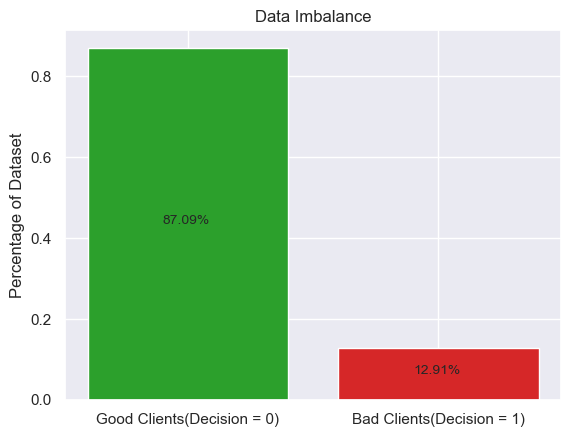

In [47]:
fig,ax = plt.subplots()

client=["Good Clients(Decision = 0)","Bad Clients(Decision = 1)"]
proportions = credit_decision["Decision"].value_counts(normalize = True)
bar_colors = ["tab:green","tab:red"]

ax.bar(client, proportions, color=bar_colors)

ax.set_ylabel("Percentage of Dataset")
ax.set_title("Data Imbalance")

ax.text(1-0.1, proportions[1]/2, "{:.2%}".format(proportions[1]),size=10)
ax.text(0-0.1, proportions[0]/2, "{:.2%}".format(proportions[0]),size=10)

fig.show()

In [48]:
y = credit_data["Decision"]
X = credit_data.drop(["Decision"], axis=1)

In [51]:
unbal_X_train, X_test, unbal_y_train, y_test = split(X,y,test_size=0.2,random_state=10)

C:\Users\vaish\AppData\Local\Temp\ipykernel_53116\132636696.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


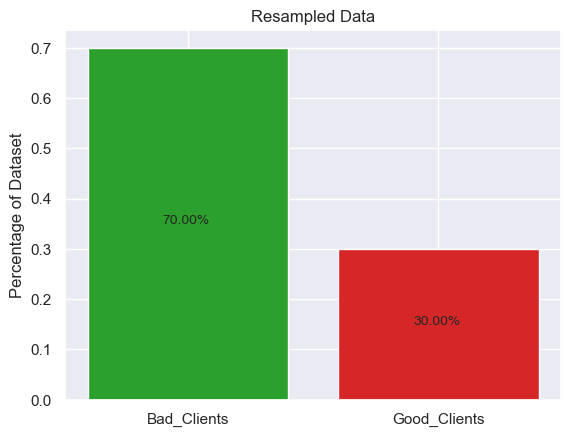

In [52]:
rus = RandomUnderSampler(sampling_strategy=(3/7), random_state=0)
rus_X_train, rus_y_train = rus.fit_resample(unbal_X_train, unbal_y_train)

fig,ax = plt.subplots()
client = ["Bad_Clients","Good_Clients"]
proportions = rus_y_train.value_counts(normalize=True)
bar_colors = ["tab:green","tab:red"]

ax.bar(client, proportions, color=bar_colors)

ax.set_ylabel("Percentage of Dataset")
ax.set_title("Resampled Data")

ax.text(1-0.1, proportions[1]/2, "{:.2%}".format(proportions[1]),size=10)
ax.text(0-0.1, proportions[0]/2, "{:.2%}".format(proportions[0]),size=10)

fig.show()

In [53]:
unbal_rf = RFC(n_estimators = 1000, max_features = 8, random_state = 0)
unbal_rf.fit(unbal_X_train, unbal_y_train)

RandomForestClassifier(max_features=8, n_estimators=1000, random_state=0)

In [54]:
rus_rf = RFC(n_estimators = 1000, max_features = 8, random_state = 0)
rus_rf.fit(rus_X_train, rus_y_train)

RandomForestClassifier(max_features=8, n_estimators=1000, random_state=0)

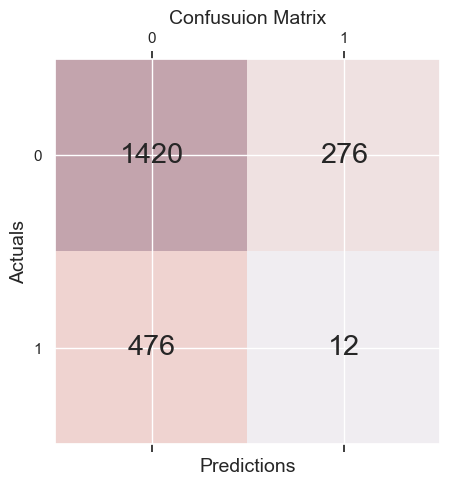

Accuracy :  65.57%
Precision :  4.17%
Recall :  2.46%
Specificity :  83.73%
F1 Score :  3.09%


In [55]:
y_pred = unbal_rf.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

fig,ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i, s=conf_matrix[i,j], va="center", ha="center", size="xx-large")

plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Actuals", fontsize=14)
plt.title("Confusuion Matrix", fontsize=14)

plt.show()

print("Accuracy : ", "{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))
print("Precision : ", "{:.2%}".format(metrics.precision_score(y_test,y_pred)))
print("Recall : ", "{:.2%}".format(metrics.recall_score(y_test,y_pred)))
print("Specificity : ", "{:.2%}".format((conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])))
print("F1 Score : ", "{:.2%}".format(metrics.f1_score(y_test,y_pred)))

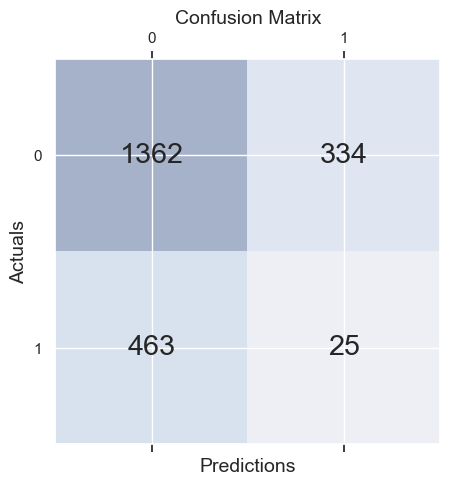

Accuracy: 63.51%
Precision: 6.96%
Recall: 5.12%
Specificity: 80.31%
F1: 5.90%


In [57]:
y_pred = rus_rf.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

print('Accuracy:', '{:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision:', '{:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall:', '{:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('Specificity:', '{:.2%}'.format((conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])))
print('F1:', '{:.2%}'.format(metrics.f1_score(y_test, y_pred)))

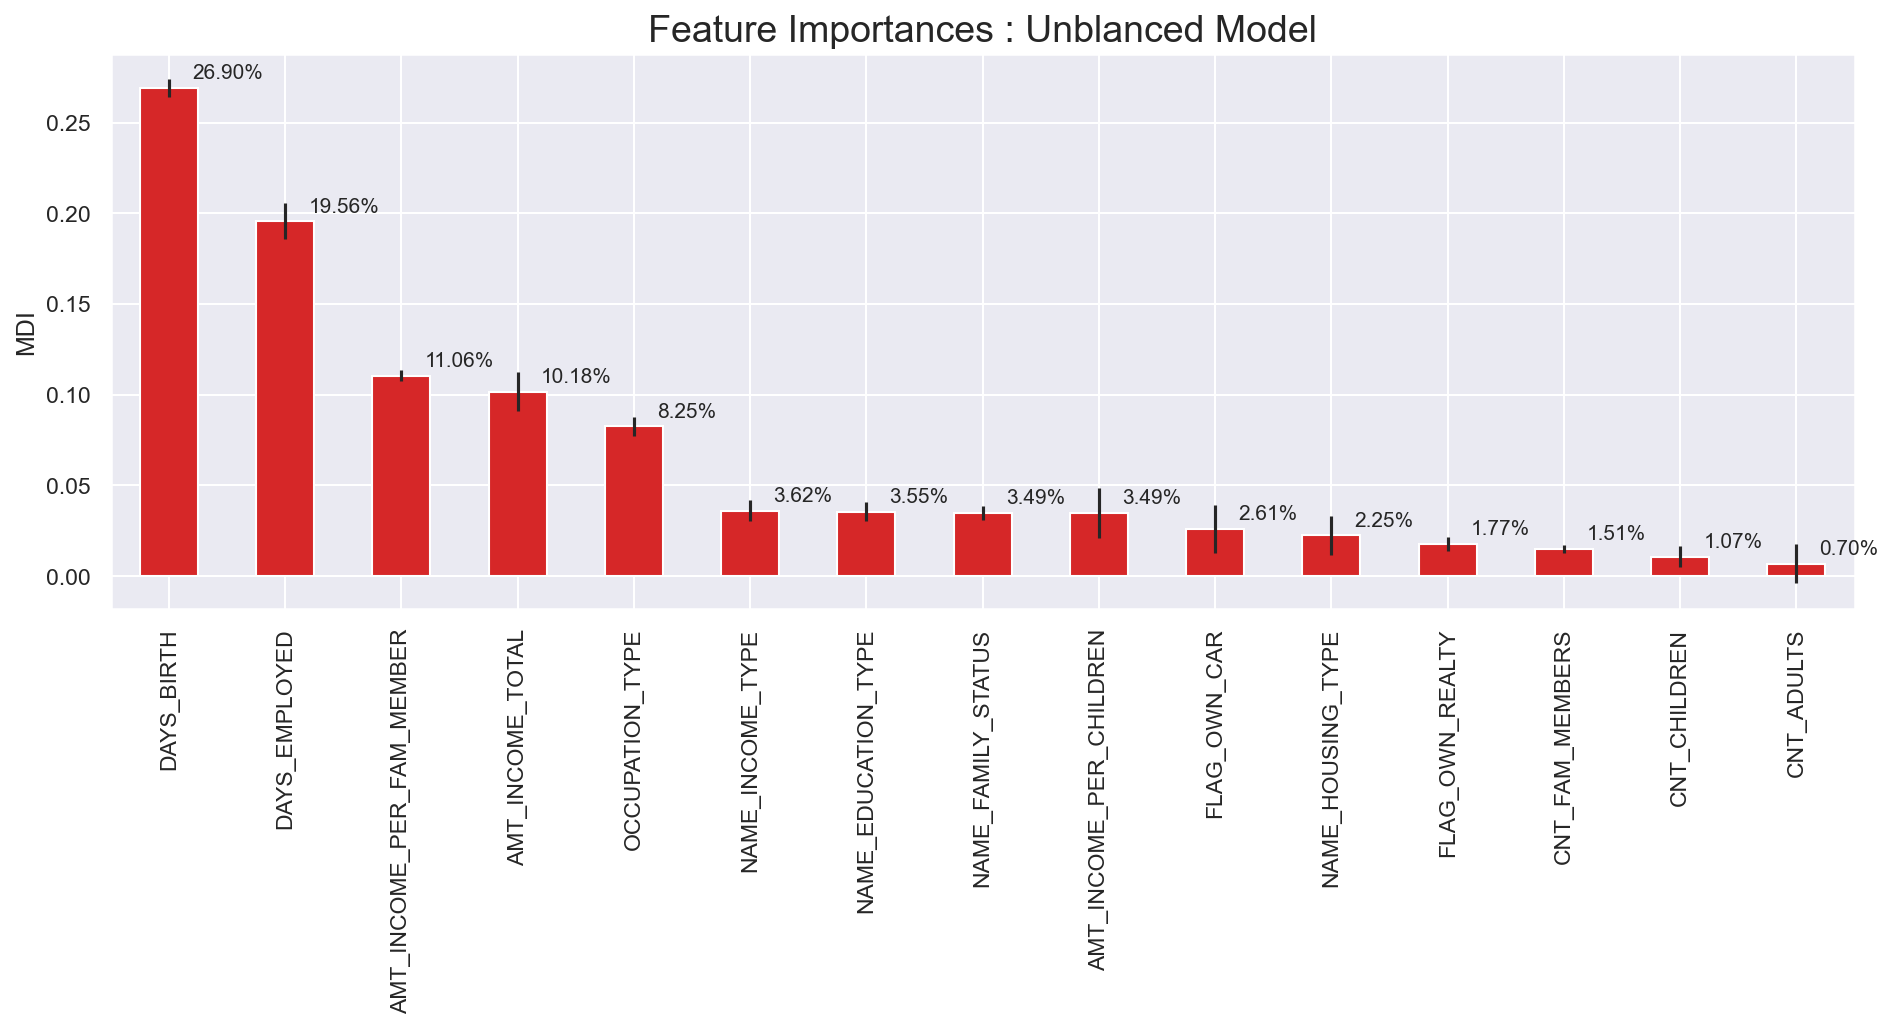

In [62]:
std = np.std([tree.feature_importances_ for tree in unbal_rf.estimators_],axis=0)
importances = pd.Series(unbal_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, ax= plt.subplots()
importances.plot.bar(yerr=std, ax=ax, color="tab:red")
ax.set_title("Feature Importances : Unblanced Model", size=18)
ax.set_ylabel("MDI")
for i in range(len(X.columns)):
    ax.text(i+0.2, importances[i]+0.005, "{:.2%}".format(importances[i]), size=10)
#plt.set_size_inches(15,7) this is not there in this version so the alternate one is in next line
fig.set_figwidth(15,7)
fig.set_dpi(150)

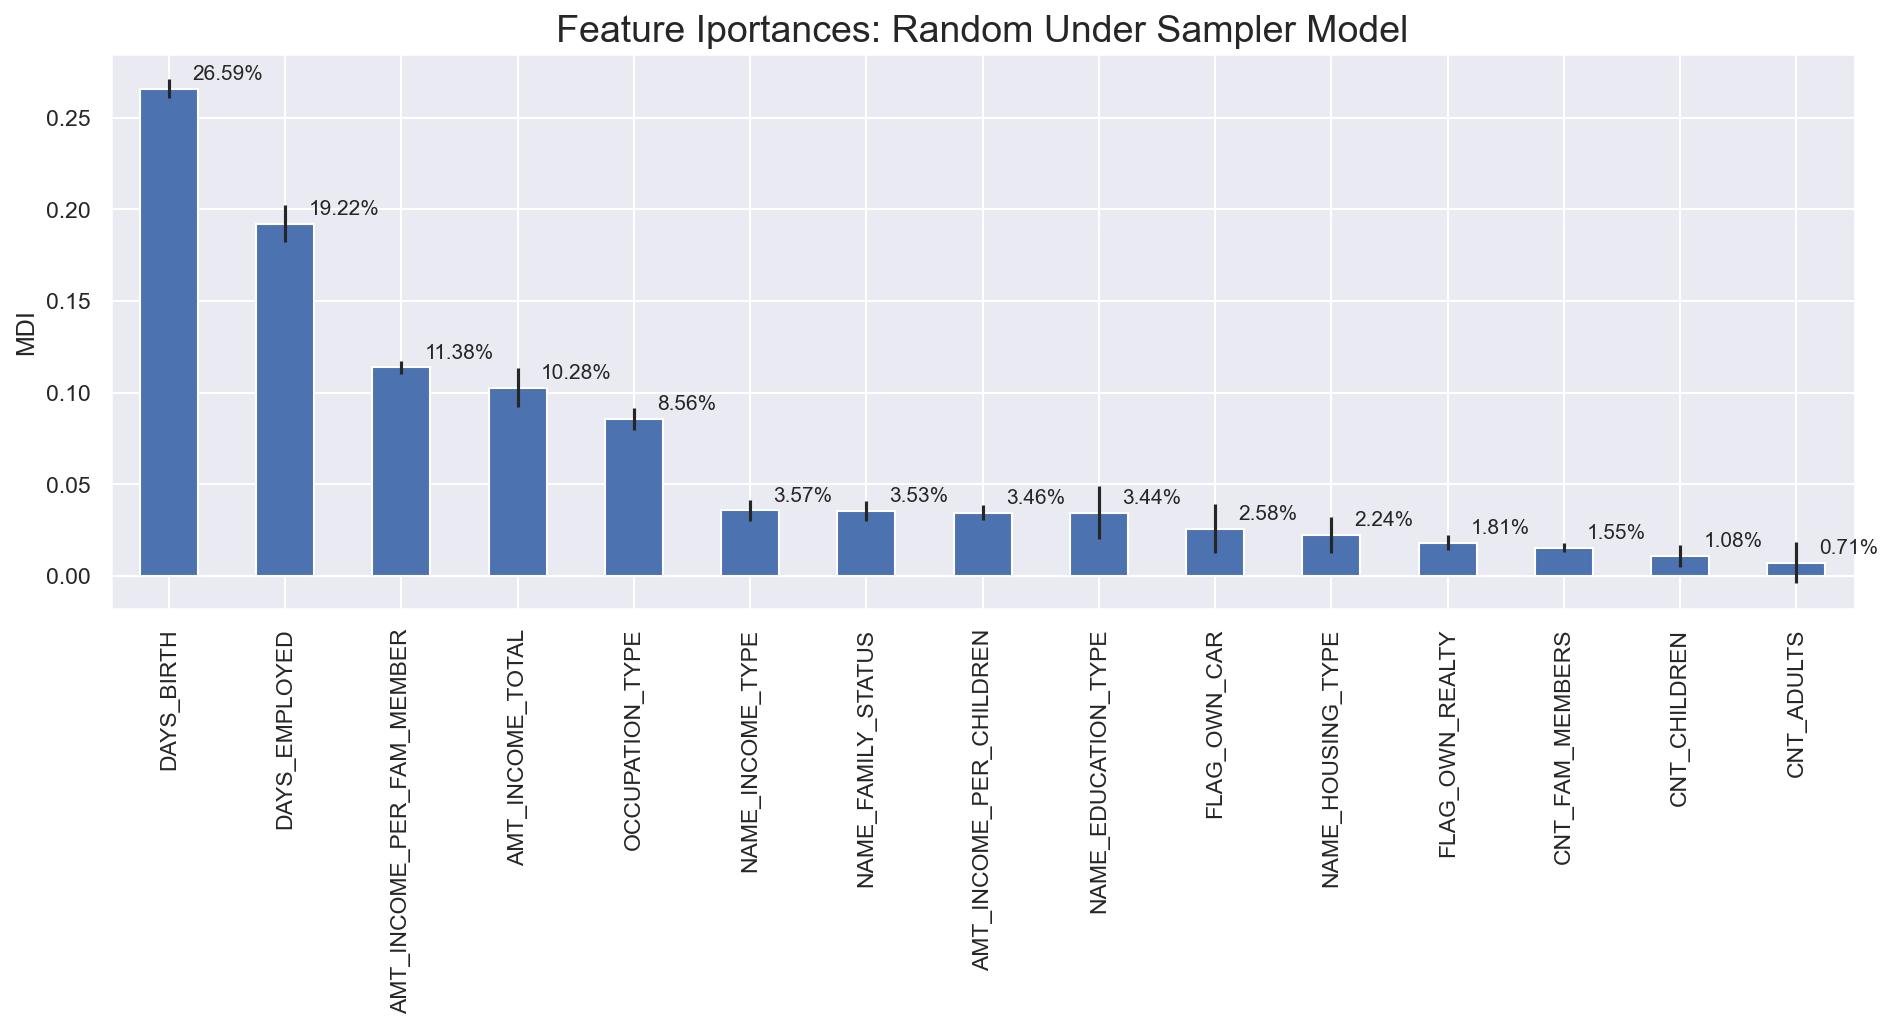

In [63]:
std = np.std([tree.feature_importances_ for tree in rus_rf.estimators_], axis=0)
importances = pd.Series(rus_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Iportances: Random Under Sampler Model", size=18)
ax.set_ylabel("MDI")
for i in range(len(X.columns)):
  ax.text(i+0.2, importances[i]+0.005, '{:.2%}'.format(importances[i]), size=10)
#plt.set_size_inches(15,7) this is not there in this version so the alternate one is in next line
fig.set_figwidth(15,7)
fig.set_dpi(150)